In [53]:
"""
Exercise 1: Binary Classification Introduction
Neural Network Classification - Module 3

This exercise covers:
- Creating synthetic data with make_circles
- Visualizing classification data with matplotlib
- Setting up device-agnostic code (CPU/GPU)
- Building a linear model (CircleModelV0)
- Making initial predictions

Learning Mottos:
- If in doubt, run the code!
- Experiment, experiment, experiment!
- Visualize, visualize, visualize!
"""

'\nExercise 1: Binary Classification Introduction\nNeural Network Classification - Module 3\n\nThis exercise covers:\n- Creating synthetic data with make_circles\n- Visualizing classification data with matplotlib\n- Setting up device-agnostic code (CPU/GPU)\n- Building a linear model (CircleModelV0)\n- Making initial predictions\n\nLearning Mottos:\n- If in doubt, run the code!\n- Experiment, experiment, experiment!\n- Visualize, visualize, visualize!\n'

In [54]:

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)


In [55]:

# ============================================
# Part 1: Creating make_circles Dataset
# ============================================

print("=" * 60)
print("Part 1: Creating make_circles Dataset")
print("=" * 60)


Part 1: Creating make_circles Dataset


In [56]:

# TODO: Create make_circles dataset
n_samples = 1000
X, y = make_circles(n_samples=n_samples, noise=0.03, factor=0.5, random_state=42)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Class 0 samples: {sum(y == 0)}")
print(f"Class 1 samples: {sum(y == 1)}")


X shape: (1000, 2)
y shape: (1000,)
Class 0 samples: 500
Class 1 samples: 500


In [57]:

# ============================================
# Part 2: Visualizing the Data
# ============================================

print("\n" + "=" * 60)
print("Part 2: Visualizing the Data")
print("=" * 60)


Part 2: Visualizing the Data


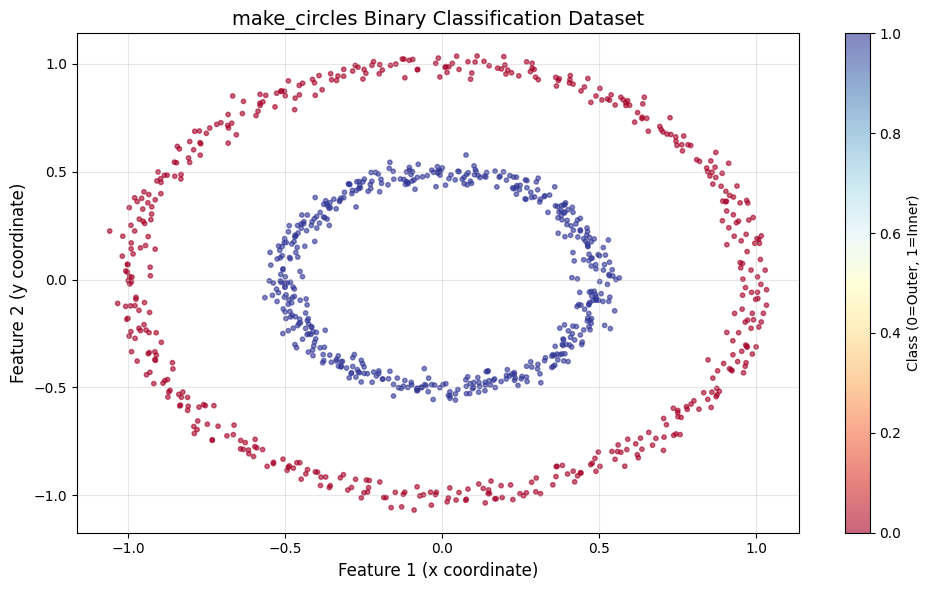

Visualization created!
Motto: Visualize, visualize, visualize!


In [58]:

# TODO: Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdYlBu", s=10, alpha=0.6)
plt.title("make_circles Binary Classification Dataset", fontsize=14)
plt.xlabel("Feature 1 (x coordinate)", fontsize=12)
plt.ylabel("Feature 2 (y coordinate)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(label="Class (0=Outer, 1=Inner)")
plt.tight_layout()
plt.show()

print("Visualization created!")
print("Motto: Visualize, visualize, visualize!")


In [59]:

# ============================================
# Part 3: Train/Test Split
# ============================================

print("\n" + "=" * 60)
print("Part 3: Train/Test Split")
print("=" * 60)



Part 3: Train/Test Split


In [60]:

# TODO: Split data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training size: {len(X_train)} ({len(X_train) / len(X) * 100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test) / len(X) * 100:.1f}%)")


Training size: 800 (80.0%)
Test size: 200 (20.0%)


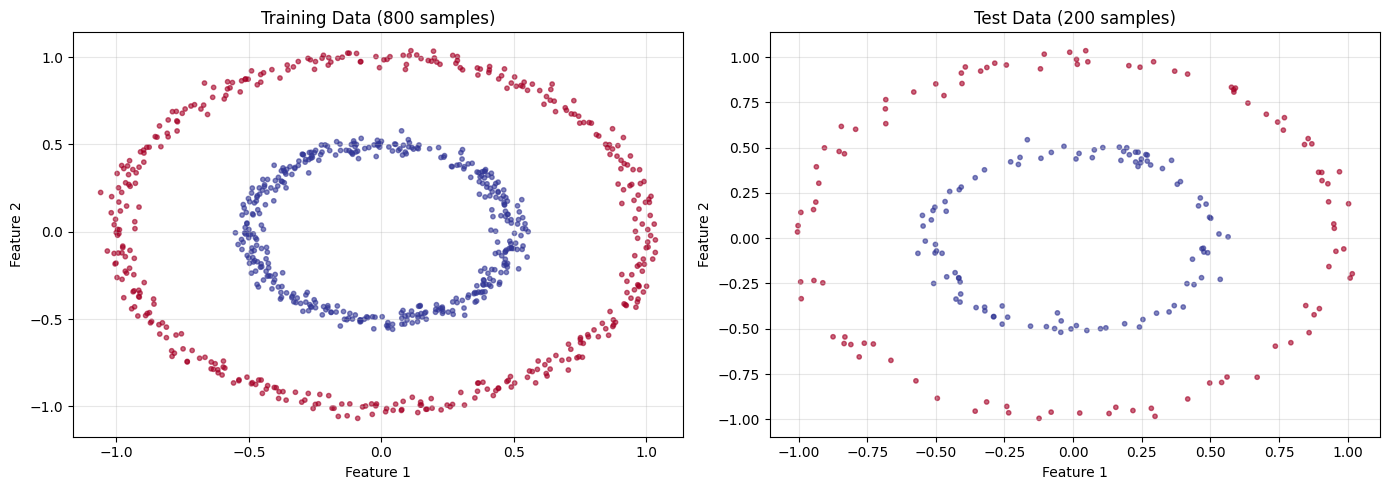

In [61]:

# TODO: Visualize the split
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="RdYlBu", s=10, alpha=0.6)
axes[0].set_title(f"Training Data ({len(X_train)} samples)")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="RdYlBu", s=10, alpha=0.6)
axes[1].set_title(f"Test Data ({len(X_test)} samples)")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [62]:

# ============================================
# Part 4: Device-Agnostic Setup
# ============================================

print("\n" + "=" * 60)
print("Part 4: Device-Agnostic Setup")
print("=" * 60)



Part 4: Device-Agnostic Setup


In [63]:

# TODO: Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

if device.type == "cuda":
    print(f"GPU: {torch.cuda.get_device_name(0)}")


Using device: cpu


In [64]:

# TODO: Convert to PyTorch tensors and move to device
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.FloatTensor(y_train).unsqueeze(1).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_test = torch.FloatTensor(y_test).unsqueeze(1).to(device)

print("\nTensor shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

print("\nTensor dtypes:")
print(f"X_train: {X_train.dtype}")
print(f"y_train: {y_train.dtype}")



Tensor shapes:
X_train: torch.Size([800, 2])
y_train: torch.Size([800, 1])
X_test: torch.Size([200, 2])
y_test: torch.Size([200, 1])

Tensor dtypes:
X_train: torch.float32
y_train: torch.float32


In [65]:

# ============================================
# Part 5: Building CircleModelV0 (Linear)
# ============================================

print("\n" + "=" * 60)
print("Part 5: Building CircleModelV0 (Linear)")
print("=" * 60)



Part 5: Building CircleModelV0 (Linear)


In [66]:


# TODO: Define linear model
class CircleModelV0(nn.Module):
    """Linear model for binary classification"""

    def __init__(self, input_size=2, hidden_size=8, output_size=1):
        super(CircleModelV0, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            # Note: No activation (linear model)
            nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        return self.layer_stack(x)



In [67]:

# TODO: Create the model
model = CircleModelV0(input_size=2, hidden_size=8, output_size=1)
model = model.to(device)

print(model)


CircleModelV0(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=1, bias=True)
  )
)


In [68]:

# TODO: Count parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {total_params:,}")



Total parameters: 33


In [69]:

# ============================================
# Part 6: Initial Predictions
# ============================================

print("\n" + "=" * 60)
print("Part 6: Initial Predictions")
print("=" * 60)



Part 6: Initial Predictions


In [70]:

# TODO: Make predictions on test set
model.eval()
with torch.inference_mode():
    # Forward pass (raw logits)
    test_logits = model(X_test)

    # Convert to probabilities
    test_probs = torch.sigmoid(test_logits)

    # Convert to labels
    test_preds = (test_probs > 0.5).long()


In [71]:

# TODO: Show some examples
print("\nFirst 5 predictions:")
for i in range(5):
    print(f"  Sample {i + 1}:")
    print(f"    Logits: {test_logits[i].item():.4f}")
    print(f"    Probability: {test_probs[i].item():.4f}")
    print(f"    Predicted: {test_preds[i].item()}, Actual: {y_test[i].item()}")



First 5 predictions:
  Sample 1:
    Logits: -0.2368
    Probability: 0.4411
    Predicted: 0, Actual: 1.0
  Sample 2:
    Logits: -0.4788
    Probability: 0.3825
    Predicted: 0, Actual: 0.0
  Sample 3:
    Logits: 0.0261
    Probability: 0.5065
    Predicted: 1, Actual: 1.0
  Sample 4:
    Logits: -0.4316
    Probability: 0.3937
    Predicted: 0, Actual: 0.0
  Sample 5:
    Logits: 0.0281
    Probability: 0.5070
    Predicted: 1, Actual: 1.0


In [72]:

# TODO: Calculate initial accuracy
accuracy = (test_preds == y_test).float().mean()
print(f"\nInitial Test Accuracy: {accuracy.item() * 100:.2f}%")
print("(Note: This is before training, so accuracy will be around 50%)")



Initial Test Accuracy: 49.50%
(Note: This is before training, so accuracy will be around 50%)


In [73]:

# ============================================
# Part 7: Understanding the Logits → Labels Pipeline
# ============================================

print("\n" + "=" * 60)
print("Part 7: Logits → Probabilities → Labels Pipeline")
print("=" * 60)



Part 7: Logits → Probabilities → Labels Pipeline


In [74]:

# TODO: Demonstrate the pipeline
sample_idx = 0
logit = test_logits[sample_idx].item()
prob = test_probs[sample_idx].item()
pred = test_preds[sample_idx].item()
actual = y_test[sample_idx].item()

print(f"\nSample {sample_idx + 1}:")
print(f"  Input: X={X_test[sample_idx].cpu().numpy()}")
print(f"  1. Logits (raw output): {logit:.4f}")
print(f"  2. Probability (sigmoid): {prob:.4f}")
print(f"  3. Label (threshold > 0.5): {pred}")
print(f"  Actual label: {actual}")



Sample 1:
  Input: X=[-0.22737482  0.4216046 ]
  1. Logits (raw output): -0.2368
  2. Probability (sigmoid): 0.4411
  3. Label (threshold > 0.5): 0
  Actual label: 1.0


In [75]:

# ============================================
# Exercises
# ============================================

print("\n" + "=" * 60)
print("Exercises")
print("=" * 60)



Exercises


Exercise 1: Experiment with noise levels
Tip: Modify the 'noise' parameter in make_circles()
Try different noise values in make_circles:
  - noise=0.0 (perfect circles)
  - noise=0.03 (default)
  - noise=0.1 (very noisy)


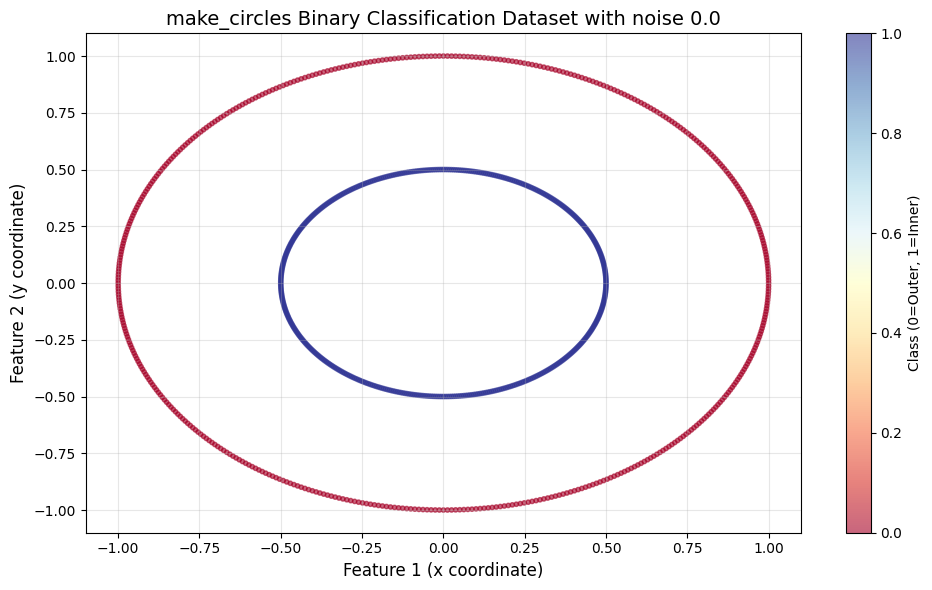

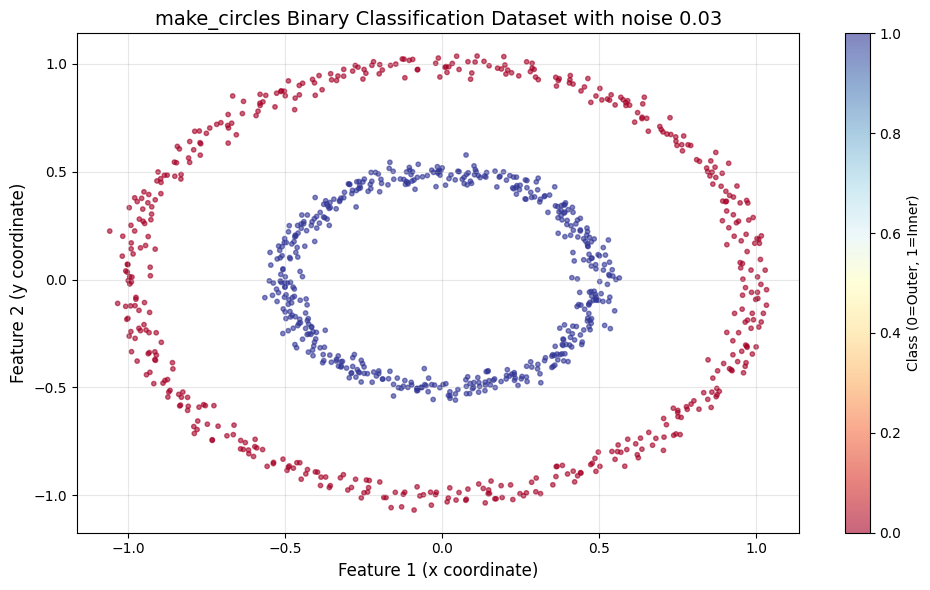

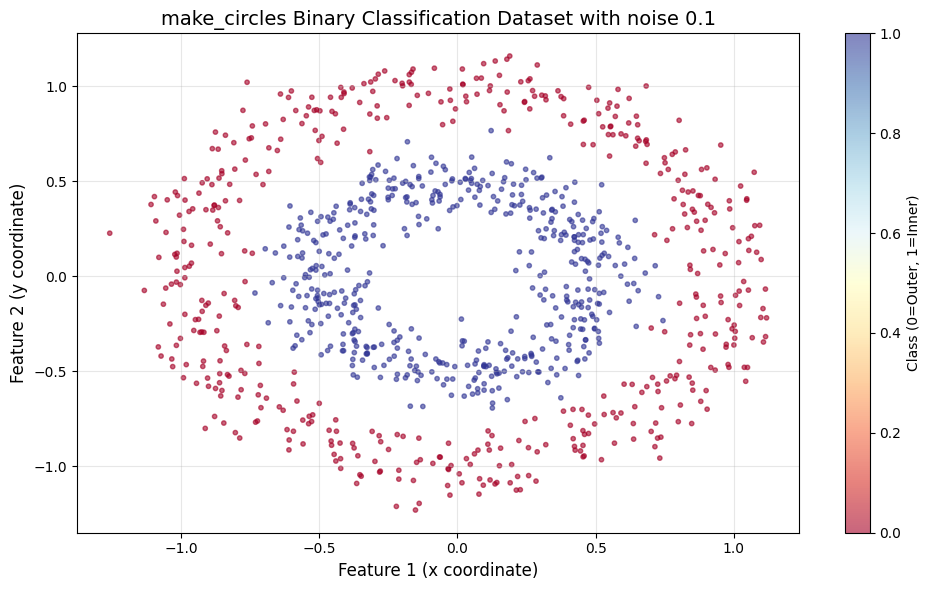

In [76]:
# Exercise 1: Experiment with different noise levels
print("Exercise 1: Experiment with noise levels")
print("Tip: Modify the 'noise' parameter in make_circles()")

print("Try different noise values in make_circles:")
print("  - noise=0.0 (perfect circles)")
print("  - noise=0.03 (default)")
print("  - noise=0.1 (very noisy)")

n_array = [0.0, 0.03, 0.1]

for noise in n_array:
    X, y = make_circles(n_samples=n_samples, noise=noise, factor=0.5, random_state=42)

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdYlBu", s=10, alpha=0.6)
    plt.title(f"make_circles Binary Classification Dataset with noise {noise}", fontsize=14)
    plt.xlabel("Feature 1 (x coordinate)", fontsize=12)
    plt.ylabel("Feature 2 (y coordinate)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.colorbar(label="Class (0=Outer, 1=Inner)")
    plt.tight_layout()
    plt.show()


Exercise 2: Try different random seeds
Set random_state to different values (42, 123, 456)
Tip: Modify torch.manual_seed() and make_circles random_state


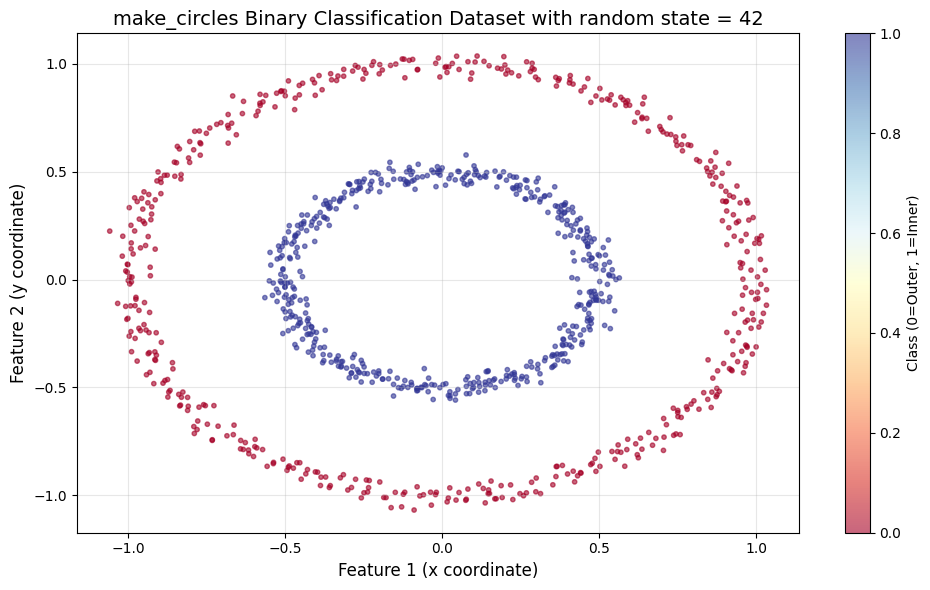

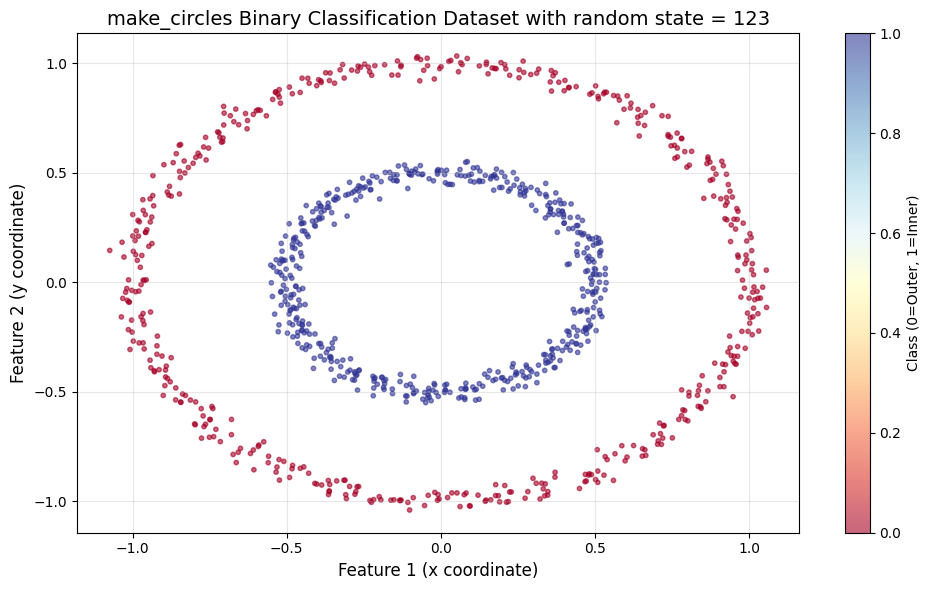

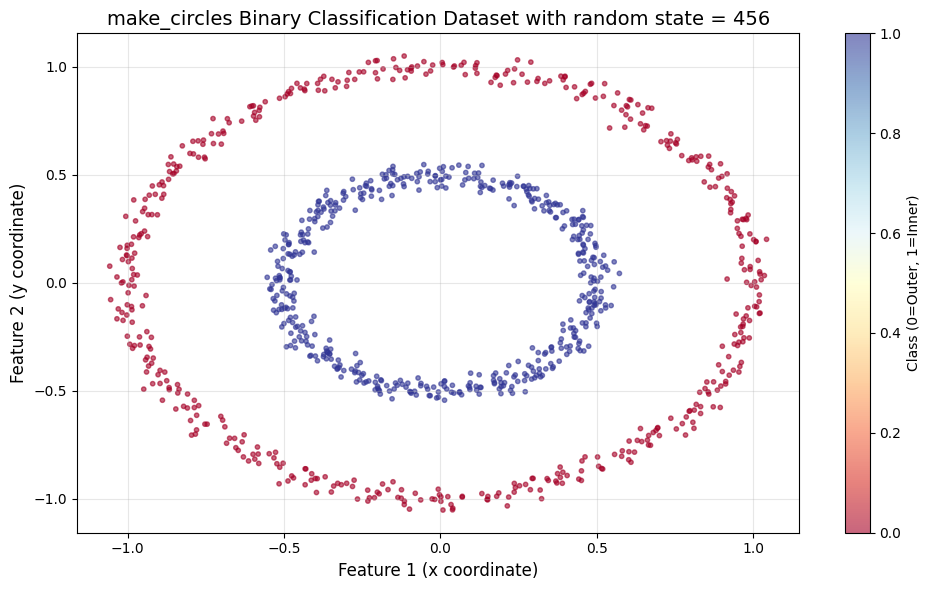

In [77]:

# Exercise 2: Try different random seeds
print("\nExercise 2: Try different random seeds")
print("Set random_state to different values (42, 123, 456)")
print("Tip: Modify torch.manual_seed() and make_circles random_state")

rs_array = [42, 123, 456]

for rs in rs_array:
    X, y = make_circles(n_samples=n_samples, noise=0.03, factor=0.5, random_state=rs)

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdYlBu", s=10, alpha=0.6)
    plt.title(f"make_circles Binary Classification Dataset with random state = {rs}", fontsize=14)
    plt.xlabel("Feature 1 (x coordinate)", fontsize=12)
    plt.ylabel("Feature 2 (y coordinate)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.colorbar(label="Class (0=Outer, 1=Inner)")
    plt.tight_layout()
    plt.show()



Exercise 3: Change train/test split ratio
Try different test_size values:
  - test_size=0.2 (80/20 split)
  - test_size=0.3 (70/30 split)
  - test_size=0.5 (50/50 split)
Tip: Modify the 'test_size' parameter in train_test_split()
Training size: 200 (20.0%)
Test size: 800 (80.0%)


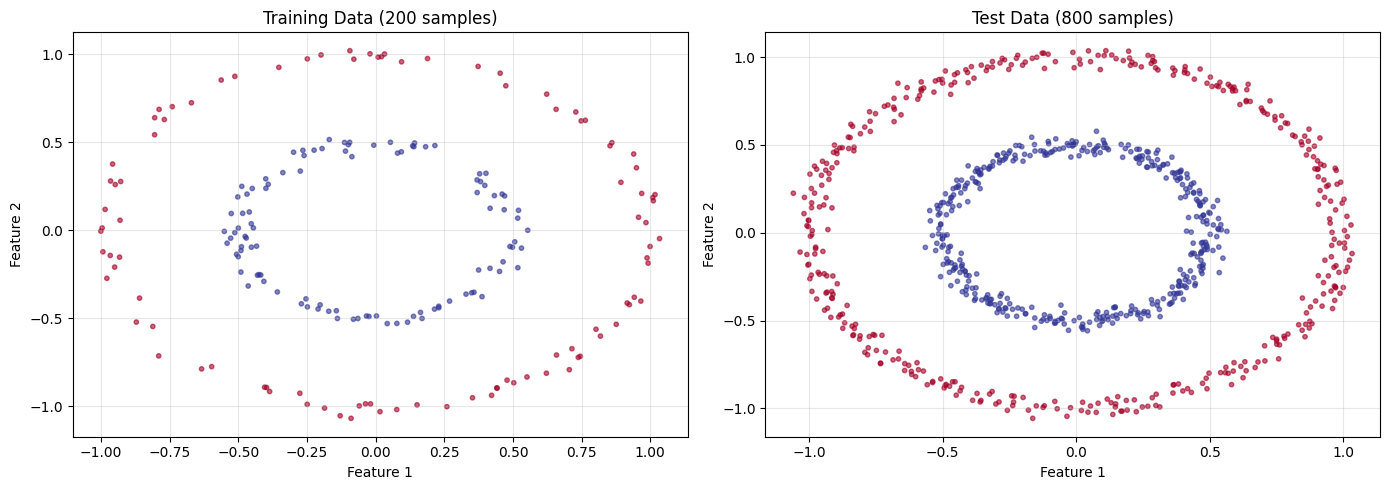

Training size: 300 (30.0%)
Test size: 700 (70.0%)


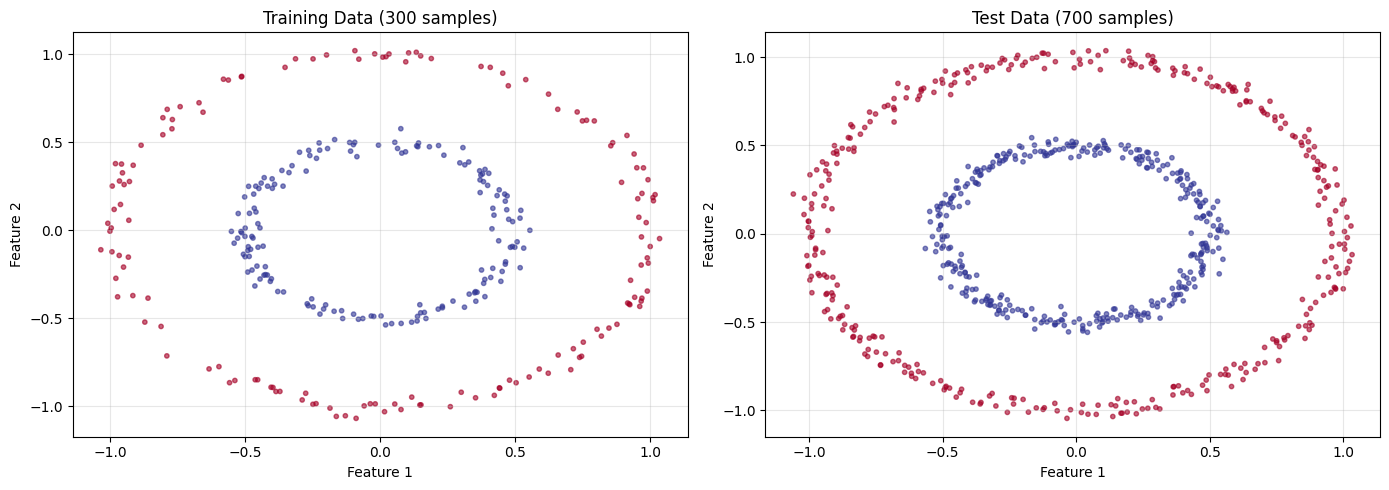

Training size: 500 (50.0%)
Test size: 500 (50.0%)


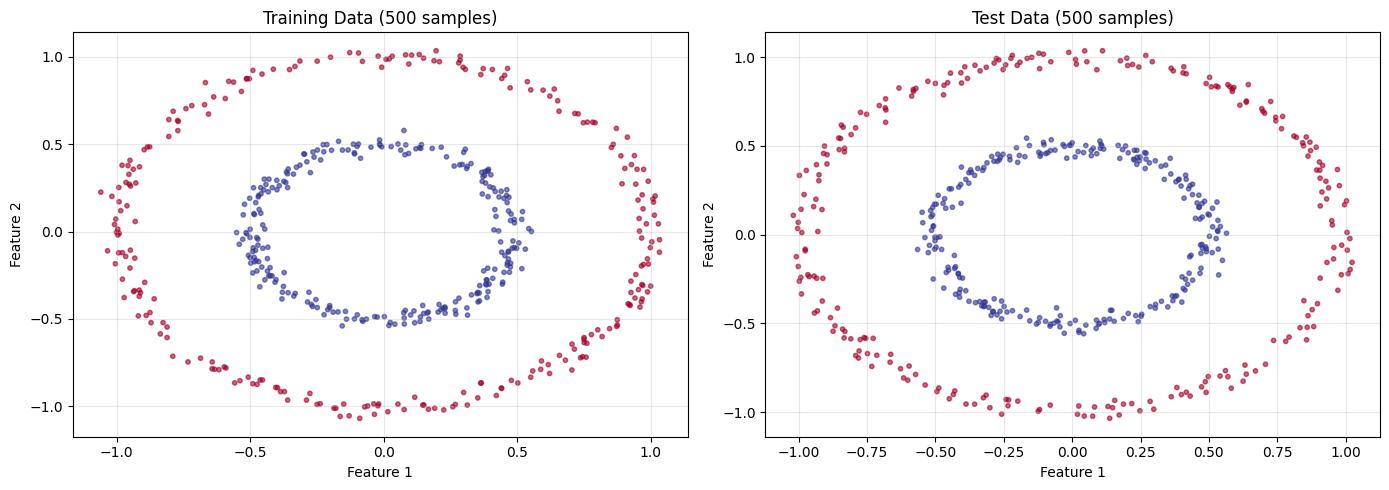

In [78]:

# Exercise 3: Change train/test split ratio
print("\nExercise 3: Change train/test split ratio")
print("Try different test_size values:")
print("  - test_size=0.2 (80/20 split)")
print("  - test_size=0.3 (70/30 split)")
print("  - test_size=0.5 (50/50 split)")
print("Tip: Modify the 'test_size' parameter in train_test_split()")

n_samples = 1000
X, y = make_circles(
    n_samples=n_samples,
    noise=0.03,
    factor=0.5,
    random_state=42
)

test_sizes = [0.8, 0.7, 0.5]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    print(f"Training size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
    print(f"Test size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

    # TODO: Visualize the split
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', s=10, alpha=0.6)
    axes[0].set_title(f'Training Data ({len(X_train)} samples)')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    axes[0].grid(True, alpha=0.3)

    axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', s=10, alpha=0.6)
    axes[1].set_title(f'Test Data ({len(X_test)} samples)')
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()



In [79]:

# Exercise 4: Explore different hidden sizes
print("\nExercise 4: Explore different hidden sizes")
print("Try different hidden_size values:")
print("  - hidden_size=4")
print("  - hidden_size=8 (default)")
print("  - hidden_size=16")
print("Tip: Modify the 'hidden_size' parameter in CircleModelV0()")

array = [4, 8, 16]
for hs in array:
    model = CircleModelV0(input_size=2, hidden_size=hs, output_size=1)
    model = model.to(device)

    # TODO: Count parameters
    print(f"\nHidden size: {hs}")
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Total parameters: {total_params:,}")


Exercise 4: Explore different hidden sizes
Try different hidden_size values:
  - hidden_size=4
  - hidden_size=8 (default)
  - hidden_size=16
Tip: Modify the 'hidden_size' parameter in CircleModelV0()

Hidden size: 4
Total parameters: 17

Hidden size: 8
Total parameters: 33

Hidden size: 16
Total parameters: 65



Exercise 5: Data exploration
Answer these questions:
  - What happens if you increase the noise?
 Answer: The two classes start to overlap more => harder classification problem, lower accuracy
  - Why does the initial model have ~50% accuracy?
 Answer: Since a straight line cannot properly separate circles (like flipping a coin) 
  - Can a linear model separate concentric circles?
 Answer: No. A linear model can only create a straight line
Tip: Visualize, experiment, and run the code!


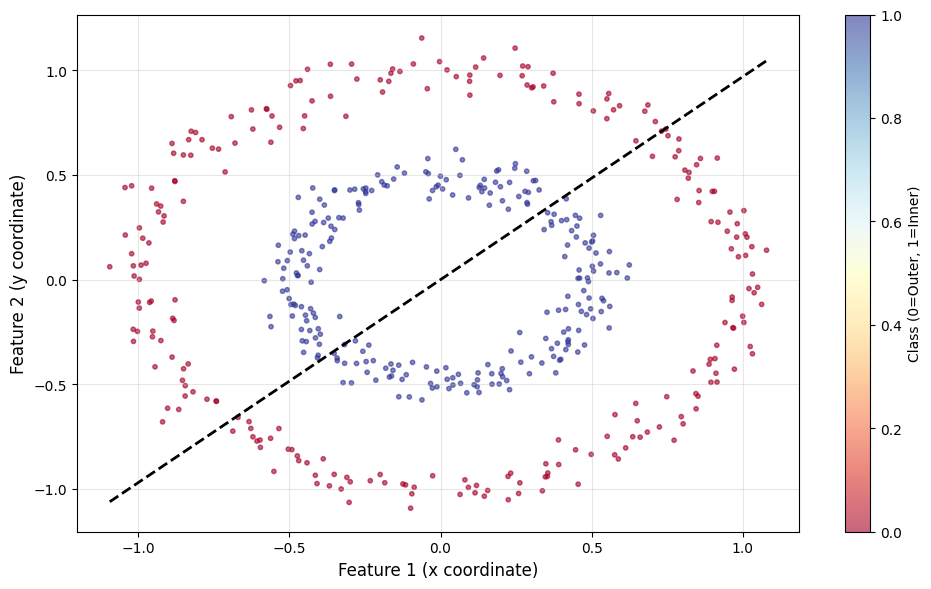

In [82]:

# Exercise 5: Data exploration
print("\nExercise 5: Data exploration")
print("Answer these questions:")
print("  - What happens if you increase the noise?")
print(" Answer: The two classes start to overlap more => harder classification problem, lower accuracy")
print("  - Why does the initial model have ~50% accuracy?")
print(" Answer: Since a straight line cannot properly separate circles (like flipping a coin) ")
print("  - Can a linear model separate concentric circles?")
print(" Answer: No. A linear model can only create a straight line")

from sklearn.linear_model import LogisticRegression


print("Tip: Visualize, experiment, and run the code!")
X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)
plt.figure(figsize=(10, 6))
model = LogisticRegression()
model.fit(X, y)
# Create grid for decision boundary line
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min()+0.5, X[:, 1].max()-0.5


xx = np.linspace(x_min, x_max, 100)
w1, w2 = model.coef_[0]
b = model.intercept_[0]
# Solve for y: y = -(w1*x + b)/w2
yy = -(w1 * xx + b) / w2
# Plot the decision boundary line
plt.plot(xx, yy, "k--", linewidth=2, label="Linear Decision Boundary")

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdYlBu", s=10, alpha=0.6)
plt.xlabel("Feature 1 (x coordinate)", fontsize=12)
plt.ylabel("Feature 2 (y coordinate)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(label="Class (0=Outer, 1=Inner)")
plt.tight_layout()
plt.show()

In [81]:

print("\n" + "=" * 60)
print("Exercise 1 Complete!")
print("Remember: If in doubt, run the code!")
print("Remember: Experiment, experiment, experiment!")
print("Remember: Visualize, visualize, visualize!")
print("=" * 60)



Exercise 1 Complete!
Remember: If in doubt, run the code!
Remember: Experiment, experiment, experiment!
Remember: Visualize, visualize, visualize!
